##Nama: Achmad Rachmandika Rizky Pratama
##Kelas: 3A
##NIM: 2041720125

##Tugas
- Lakukan klasifikasi pada data MNIST dengan menggunakan model ANN
Anda diperbolehkan melakukan eksplorasi terhadap,
- Metode pra pengolahan
- Pemilihan fitur
- Arsitektur ANN
- Fungsi Aktiviasi
- ANN diimplementasikan dengan menggunakan tensorflow.
- DIKERJAKAN SECARA BERKELOMPOK
- JELASKAN HASIL YANG ANDA DAPATKAN,
- AKURASI
- CONFUSION MATRIX
- KONFIGURASI MODEL --> MULAI DARI PRA PENGOLAHAN SAMPAI ARSITEKTUR ANN

Install Tensorflow

In [1]:
pip install tensorflow

Import Library

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

Load Datasen MNIST

In [3]:
# Load dataset
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


Normalisasi Data

In [4]:
# Normalisasi data
train_images, test_images = train_images / 255.0, test_images / 255.0

Arsitektur Model ANN

In [5]:
# Mendefinisikan model ANN
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),  # Meratakan gambar 28x28 piksel menjadi vektor 1D
    layers.Dense(128, activation='relu'),  # Lapisan tersembunyi dengan 128 neuron dan aktivasi ReLU
    layers.Dropout(0.2),  # Lapisan dropout untuk mencegah overfitting
    layers.Dense(10, activation='softmax')  # Lapisan output dengan 10 neuron untuk 10 kelas
])

In [11]:
# Mengompilasi model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
# Melatih model
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0669 - accuracy: 0.9787
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0589 - accuracy: 0.9815
Epoch 3/5
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0518 - accuracy: 0.9830
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0493 - accuracy: 0.9840
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0446 - accuracy: 0.9851


Melakukan Evaluasi

In [13]:
# Mengevaluasi model
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_accuracy}')

313/313 [==============================] - 1s 2ms/step - loss: 0.0713 - accuracy: 0.9804
Test accuracy: 0.980400025844574


In [14]:
# Membuat prediksi
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)


313/313 [==============================] - 1s 2ms/step


Confusion Matrix

In [15]:
# Membuat dan menampilkan matriks konfusi
cm = confusion_matrix(test_labels, predicted_labels)
print('Confusion Matrix:')
print(cm)

Confusion Matrix:
[[ 970    1    1    1    2    1    1    1    2    0]
 [   0 1124    4    1    0    0    3    0    3    0]
 [   3    0 1009    3    3    0    2    6    6    0]
 [   0    0    3  998    0    2    0    4    2    1]
 [   1    0    4    1  959    1    1    0    3   12]
 [   2    0    0   11    1  867    3    1    5    2]
 [   2    3    1    2    3    3  943    0    1    0]
 [   2    4    7    1    1    0    0 1002    2    9]
 [   2    0    1    6    4    4    3    2  950    2]
 [   2    2    0    7    8    2    0    4    2  982]]


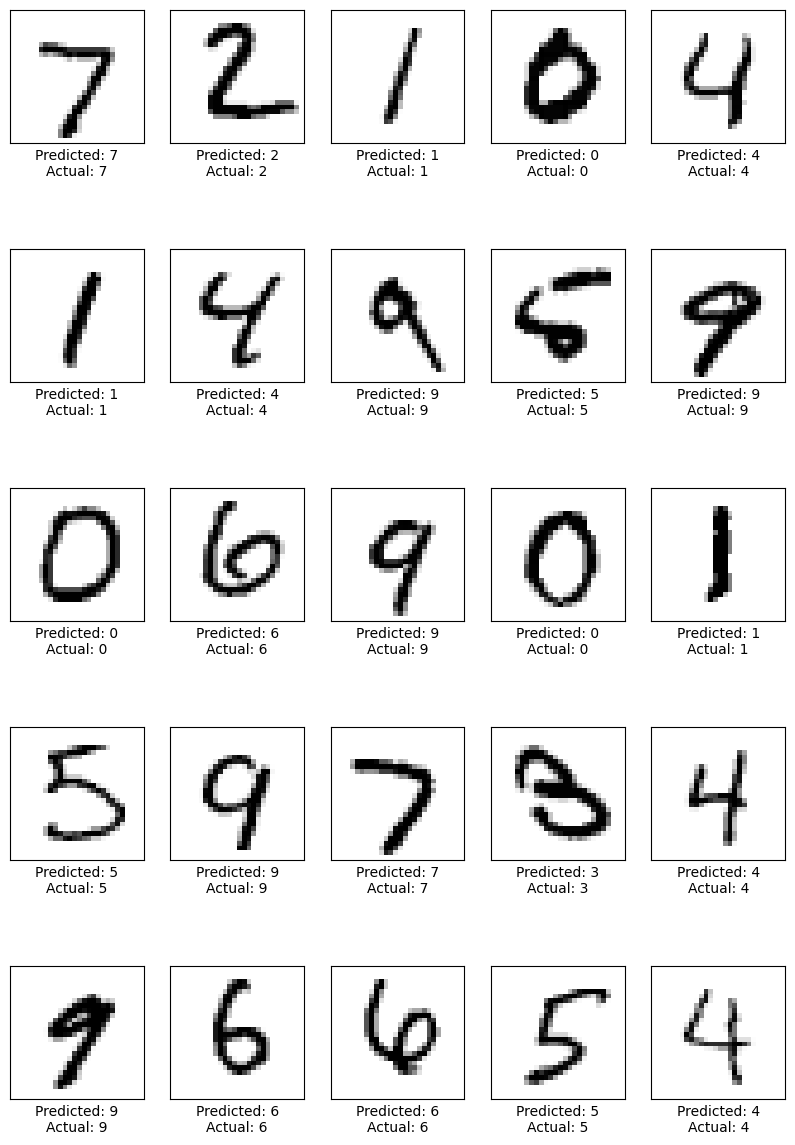

In [16]:
# Visualisasi beberapa prediksi
plt.figure(figsize=(10, 15))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel(f'Predicted: {predicted_labels[i]}\nActual: {test_labels[i]}')
plt.show()

Akurasi prediksinya akurat